In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow_probability

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import os
from astropy.io import fits
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_probability as tfp
import numpy as np
# import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


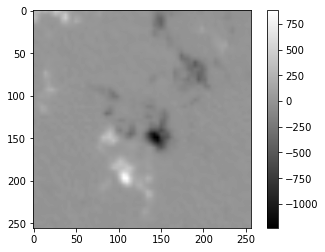

In [ ]:
from astropy.utils.data import get_pkg_data_filename
image_1 = get_pkg_data_filename('drive/MyDrive/data/image/mdi_20100501_000000_TAI_0.fits')
image_1 = fits.getdata(image_1, ext=0)
plt.figure()
plt.imshow(image_1, cmap='gray')
plt.colorbar()

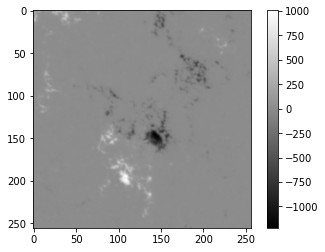

In [ ]:
image_2 = get_pkg_data_filename('drive/MyDrive/data/label/hmi.M_720s.20100501_000000_TAI_0.fits')
image_2 = fits.getdata(image_2, ext=0)
# plt.figure(figsize=(6, 12))
# plt.subplot(1, 2, 1)
# plt.imshow(image_1, cmap='gray')
# plt.colorbar()
# plt.subplot(1, 2, 2)
# plt.imshow(image_2, cmap='gray')
# plt.colorbar()
plt.figure()
plt.imshow(image_2, cmap='gray')
plt.colorbar()

In [ ]:
input_path = "drive/MyDrive/data/image/"
label_path = "drive/MyDrive/data/label/"
output_path = "drive/MyDrive/data/output/"

In [ ]:
input_data_row = []
for name in os.listdir(input_path):
    # print(name)
    fits_file = fits.open(input_path + name)
    fits_data = fits_file[0].data
    # print(fits_data.max(), fits_data.min())
    input_data_row.append((name, fits_data))

In [ ]:
input_data_sort = sorted(input_data_row,key = lambda x:x[0])

In [ ]:
input_data = []
for i in input_data_sort:
  input_data.append(i[1])

In [ ]:
input_data = tf.Variable(initial_value=input_data, dtype=tf.float32)

In [ ]:
input_data.shape

TensorShape([1569, 256, 256])

In [ ]:
label_data_row = []
for name in os.listdir(label_path):
    # print(name)
    fits_file = fits.open(label_path + name)
    fits_data = fits_file[0].data
    # print(fits_data.max(), fits_data.min())
    label_data_row.append((name, fits_data))

In [ ]:
label_data_sort = sorted(label_data_row,key = lambda x:x[0])

In [ ]:
label_data = []
for i in label_data_sort:
  label_data.append(i[1])

In [ ]:
label_data = tf.Variable(initial_value=label_data, dtype=tf.float32)

In [ ]:
label_data.shape

TensorShape([1569, 256, 256])

In [ ]:
# data_d = tf.reshape(input_data, shape=(-1))
# plt.figure()
# sns.kdeplot(data_d)

In [ ]:
top = 1500.
tail = -1500.

def normal_(data_list):
    # return (data_list - tail) / (top - tail)
    return data_list / top

def dis_normal_(data_list):
    # return ((top - tail) * data_list + tail)
    return data_list * top

In [ ]:
def map_data(data_list):
  return 1 / (1 + tf.math.exp(-0.01 * data_list))

def dis_map_data(data_list):
  return -100 * tf.math.log(1 / (data_list + 0.000001) - 1 + 0.000001)

In [ ]:
input_data = tf.clip_by_value(input_data, clip_value_min=-1500., clip_value_max=1500.)
label_data = tf.clip_by_value(label_data, clip_value_min=-1500., clip_value_max=1500.)

In [ ]:
# input_data = tf.keras.utils.normalize(input_data)
# label_data = tf.keras.utils.normalize(label_data)

input_data = normal_(input_data)
label_data = normal_(label_data)

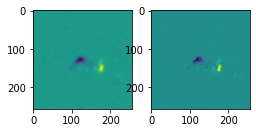

In [ ]:
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(input_data[30])
plt.subplot(1, 3, 2)
plt.imshow(label_data[30])
# input_data[0:1100], input_data[1100:]

In [ ]:
input_data = tf.reshape(input_data, shape=(-1, 256, 256, 1))
label_data = tf.reshape(label_data, shape=(-1, 256, 256, 1))

In [ ]:
x_train, x_test = input_data[0:-76], input_data[-76:]

In [ ]:
y_train, y_test = label_data[0:-76], label_data[-76:]

In [ ]:
# data_gather = tf.range(0, x_train.shape[0], 1)
# data_gather = tf.random.shuffle(data_gather)
# data_gather = tf.Variable(initial_value=np.load("drive/MyDrive/data/model/data_list_0415.npy"), dtype=tf.int32)

# x_train = tf.gather(params=x_train, indices=data_gather)
# y_train = tf.gather(params=y_train, indices=data_gather)

In [ ]:
# x_train, x_test_same = x_train[0:-50], x_train[-50:]
# y_train, y_test_same = y_train[0:-50], y_train[-50:]

In [ ]:
# x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_test_same.shape, y_test_same.shape

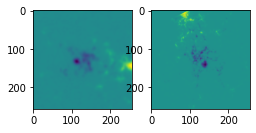

In [ ]:
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(tf.reshape(x_train[100], (256, 256)))
plt.subplot(1, 3, 2)
plt.imshow(tf.reshape(tfa.image.rotate(y_train[100], 90), (256, 256)))

In [ ]:
x_train, y_train = tf.concat([x_train, tfa.image.rotate(x_train, 90)], 0), tf.concat([y_train, tfa.image.rotate(y_train, 90)], 0)
x_train, y_train = tf.concat([x_train, tfa.image.rotate(x_train, 180)], 0), tf.concat([y_train, tfa.image.rotate(y_train, 180)], 0)
print(x_train.shape, y_train.shape)

(5972, 256, 256, 1) (5972, 256, 256, 1)


In [ ]:
test_data = tf.reshape(x_train[0], shape=(64, 64, -1))
test_data_h = tf.transpose(test_data, perm=[2,0,1])
test_data_w = tf.transpose(test_data, perm=[2,1,0])
print(test_data_h.shape, test_data_w.shape)
print(tf.signal.dct(test_data_h).shape,tf.signal.dct(test_data_h).shape)

(16, 64, 64) (16, 64, 64)
(16, 64, 64) (16, 64, 64)


In [ ]:
channel = 64
# k = 5

input_0 = tf.keras.layers.Input(shape=(256, 256, 1))
reshape_1 = tf.keras.layers.Reshape((256, 256, 1))(input_0)

# rotate = tf.keras.layers.RandomRotation(factor=(-1.0, 1.0), seed=7)(reshape_1)

patch = tf.keras.layers.Conv2D(filters=1, kernel_size=16, strides=(16, 16))(reshape_1) #, kernel_regularizer='l2'

# bn = tf.keras.layers.BatchNormalization()(reshape_1)

con2d_start = tf.keras.layers.Conv2D(filters=channel, kernel_size=(13, 13), activation='relu', padding='same', kernel_regularizer='l2')(reshape_1) #256, 256

# down 1
con2d_d11 = tf.keras.layers.Conv2D(filters=channel, kernel_size=(3, 3), activation='relu', padding='same')(con2d_start)
con2d_d12 = tf.keras.layers.Conv2D(filters=channel * 2, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2')(con2d_d11)
down_1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(con2d_d12)  #128, 128
# bn_d1 = tf.keras.layers.BatchNormalization()(down_1)
drop_d1 = tf.keras.layers.Dropout(0.2)(down_1)

# down 2
con2d_d21 = tf.keras.layers.Conv2D(filters=channel * 2, kernel_size=(3, 3), activation='relu', padding='same')(drop_d1)
con2d_d22 = tf.keras.layers.Conv2D(filters=channel * 4, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2')(con2d_d21)
down_2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(con2d_d22)  #64, 64
# bn_d2 = tf.keras.layers.BatchNormalization()(down_2)
drop_d2 = tf.keras.layers.Dropout(0.2)(down_2)

# down 3
con2d_d31 = tf.keras.layers.Conv2D(filters=channel * 4, kernel_size=(3, 3), activation='relu', padding='same')(drop_d2)
con2d_d32 = tf.keras.layers.Conv2D(filters=channel * 8, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2')(con2d_d31)
down_3 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(con2d_d32)  #32, 32
# bn_d3 = tf.keras.layers.BatchNormalization()(down_3)
drop_d3 = tf.keras.layers.Dropout(0.2)(down_3)

# down 4
con2d_d41 = tf.keras.layers.Conv2D(filters=channel * 8, kernel_size=(3, 3), activation='relu', padding='same')(drop_d3)
con2d_d42 = tf.keras.layers.Conv2D(filters=channel * 16, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2')(con2d_d41)
down_4 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(con2d_d42)  #16, 16
# bn_d4 = tf.keras.layers.BatchNormalization()(down_4)
drop_d4 = tf.keras.layers.Dropout(0.2)(down_4)

# middle 1
con2d_m11 = tf.keras.layers.Conv2D(filters=channel * 16, kernel_size=(3, 3), padding='same')(drop_d4)
bn_m11 = tf.keras.layers.BatchNormalization()(con2d_m11)
act_m11 = tf.keras.layers.Activation('relu')(bn_m11)

cat_m1 = tf.keras.layers.Concatenate(axis=-1)([act_m11, patch])

con2d_m12 = tf.keras.layers.Conv2D(filters=channel * 16, kernel_size=(3, 3), padding='same')(cat_m1)
add_m12 = tf.keras.layers.Add()([drop_d4, con2d_m12])
bn_m12 = tf.keras.layers.BatchNormalization()(add_m12)
act_m12 = tf.keras.layers.Activation('relu')(bn_m12)

# drop_att_m1 = tf.keras.layers.Dropout(0.2)(act_m12)
# att_m1 = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=16, dropout=0.2, attention_axes=(0, 1))(drop_att_m1, drop_att_m1)
# add_att_m1 = tf.keras.layers.Add()([att_m1, act_m12])
# attout_m1 = tf.keras.layers.BatchNormalization()(add_att_m1)

# middle 2
con2d_m21 = tf.keras.layers.Conv2D(filters=channel * 16, kernel_size=(3, 3), padding='same')(act_m12)
bn_m21 = tf.keras.layers.BatchNormalization()(con2d_m21)
act_m21 = tf.keras.layers.Activation('relu')(bn_m21)

cat_m2 = tf.keras.layers.Concatenate(axis=-1)([act_m21, patch])

con2d_m22 = tf.keras.layers.Conv2D(filters=channel * 16, kernel_size=(3, 3), padding='same')(cat_m2)
add_m22 = tf.keras.layers.Add()([act_m12, con2d_m22])
bn_m22 = tf.keras.layers.BatchNormalization()(add_m22)
act_m22 = tf.keras.layers.Activation('relu')(bn_m22)

# drop_att_m2 = tf.keras.layers.Dropout(0.2)(act_m22)
# att_m2 = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=16, dropout=0.2, attention_axes=(0, 1))(drop_att_m2, drop_att_m2)
# add_att_m2 = tf.keras.layers.Add()([att_m2, act_m22])
# attout_m2 = tf.keras.layers.BatchNormalization()(add_att_m2)

# middle 3
con2d_m31 = tf.keras.layers.Conv2D(filters=channel * 16, kernel_size=(3, 3), padding='same')(act_m22)
bn_m31 = tf.keras.layers.BatchNormalization()(con2d_m31)
act_m31 = tf.keras.layers.Activation('relu')(bn_m31)

cat_m3 = tf.keras.layers.Concatenate(axis=-1)([act_m31, patch])

con2d_m32 = tf.keras.layers.Conv2D(filters=channel * 16, kernel_size=(3, 3), padding='same')(cat_m3)
add_m32 = tf.keras.layers.Add()([act_m22, con2d_m32])
bn_m32 = tf.keras.layers.BatchNormalization()(add_m32)
act_m32 = tf.keras.layers.Activation('relu')(bn_m32)

# middle 4
# con2d_m41 = tf.keras.layers.Conv2D(filters=channel * 16, kernel_size=(3, 3), padding='same')(act_m32)
# bn_m41 = tf.keras.layers.BatchNormalization()(con2d_m41)
# act_m41 = tf.keras.layers.Activation('relu')(bn_m41)

# cat_m4 = tf.keras.layers.Concatenate(axis=-1)([act_m41, patch])

# con2d_m42 = tf.keras.layers.Conv2D(filters=channel * 16, kernel_size=(3, 3), padding='same')(cat_m4)
# add_m42 = tf.keras.layers.Add()([act_m22, con2d_m42])
# bn_m42 = tf.keras.layers.BatchNormalization()(add_m42)
# act_m42 = tf.keras.layers.Activation('relu')(bn_m42)

# drop_att_m3 = tf.keras.layers.Dropout(0.2)(act_m32)
# att_m3 = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=32, attention_axes=(0, 1, 2))(drop_att_m3, drop_att_m3)
# add_att_m3 = tf.keras.layers.Add()([att_m3, act_m32])
# attout_m3 = tf.keras.layers.BatchNormalization()(add_att_m3)

# # ECA_0 attentation
# drop_att = tf.keras.layers.Dropout(0.2)(act_m32)
# GAP_0 = tf.keras.layers.GlobalAveragePooling2D()(drop_att)
# reshape_ECA_0_0 = tf.keras.layers.Reshape((-1, 1))(GAP_0)
# con1d_0_head0 = tf.keras.layers.Conv1D(1, kernel_size=k+4, padding='same', use_bias=False)(reshape_ECA_0_0)
# reshape_ECA_1_0_head0 = tf.keras.layers.Reshape((1, 1, -1))(con1d_0_head0)
# act_ECA_0_head0 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_0_head0)
# mul_ECA_0_head0 = tf.keras.layers.Multiply()([act_m32, act_ECA_0_head0])

# con1d_0_head1 = tf.keras.layers.Conv1D(1, kernel_size=k+4, padding='same', use_bias=False)(reshape_ECA_0_0)
# reshape_ECA_1_0_head1 = tf.keras.layers.Reshape((1, 1, -1))(con1d_0_head1)
# act_ECA_0_head1 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_0_head1)
# mul_ECA_0_head1 = tf.keras.layers.Multiply()([act_m32, act_ECA_0_head1])
# concat_ECA_0_0 = tf.keras.layers.Concatenate(axis=-1)([mul_ECA_0_head0, mul_ECA_0_head1])

# con1d_0_head2 = tf.keras.layers.Conv1D(1, kernel_size=k+4, padding='same', use_bias=False)(reshape_ECA_0_0)
# reshape_ECA_1_0_head2 = tf.keras.layers.Reshape((1, 1, -1))(con1d_0_head2)
# act_ECA_0_head2 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_0_head2)
# mul_ECA_0_head2 = tf.keras.layers.Multiply()([act_m32, act_ECA_0_head2])
# concat_ECA_0_1 = tf.keras.layers.Concatenate(axis=-1)([concat_ECA_0_0, mul_ECA_0_head2])

# Fac_0 attentation
GAP_0 = tf.keras.layers.GlobalAveragePooling2D()(tf.signal.dct(act_m32))
reshape_Fac_0 = tf.keras.layers.Reshape((-1, ))(GAP_0)
con1d_0_head0 = tf.keras.layers.Dense(channel * 32, activation='relu')(reshape_Fac_0)
act_Fac_0_head0 = tf.keras.layers.Dense(channel * 16, activation='sigmoid')(con1d_0_head0)
reshape_Fac_0_head0 = tf.keras.layers.Reshape((1, 1, -1))(act_Fac_0_head0)
mul_Fac_0_head0 = tf.keras.layers.Multiply()([act_m32, reshape_Fac_0_head0])

con1d_0_head1 = tf.keras.layers.Dense(channel * 32, activation='relu')(reshape_Fac_0)
act_Fac_0_head1 = tf.keras.layers.Dense(channel * 16, activation='sigmoid')(con1d_0_head1)
reshape_Fac_0_head1 = tf.keras.layers.Reshape((1, 1, -1))(act_Fac_0_head1)
mul_Fac_0_head1 = tf.keras.layers.Multiply()([act_m32, reshape_Fac_0_head1])

concat_Fac_0 = tf.keras.layers.Concatenate(axis=-1)([mul_Fac_0_head0, mul_Fac_0_head1])

# con1d_0_head2 = tf.keras.layers.Dense(channel * 32, activation='relu')(reshape_Fac_0_0)
# act_Fac_0_head2 = tf.keras.layers.Dense(channel * 16, activation='sigmoid')(con1d_0_head2)
# reshape_Fac_1_0_head2 = tf.keras.layers.Reshape((1, 1, -1))(act_Fac_0_head2)
# mul_Fac_0_head2 = tf.keras.layers.Multiply()([act_m32, reshape_Fac_1_0_head2])

# up 1
# up_1 = tf.keras.layers.UpSampling2D(size=(2, 2))(act_m32)
up_1 = tf.keras.layers.Conv2DTranspose(filters=channel * 8, kernel_size=(2, 2), strides=(2, 2), activation=tfa.activations.mish)(concat_Fac_0)
drop_u1 = tf.keras.layers.Dropout(0.2)(up_1)
con2d_u10 = tf.keras.layers.Conv2D(filters=channel * 8, kernel_size=(3, 3), activation=tfa.activations.mish, padding='same')(drop_u1)

# con2d_u11 = tf.keras.layers.Conv2D(filters=channel * 8, kernel_size=(3, 3), activation=tfa.activations.mish, padding='same')(con2d_u10)
# con2d_u12 = tf.keras.layers.Conv2D(filters=channel * 4, kernel_size=(1, 1), activation=tfa.activations.mish, padding='same')(con2d_u11)
# cat_u1 = tf.keras.layers.Concatenate(axis=-1)([con2d_u11, con2d_u12])
# add_u1 = tf.keras.layers.Add()([up_1, con2d_u11])
# bn_u1 = tf.keras.layers.BatchNormalization()(add_u1)
# act_u1 = tf.keras.layers.Activation(tfa.activations.mish)(bn_u1)

# # ECA_1 attentation
# GAP_1 = tf.keras.layers.GlobalAveragePooling2D()(con2d_u10)
# reshape_ECA_0_1 = tf.keras.layers.Reshape((-1, 1))(GAP_1)
# con1d_1_head0 = tf.keras.layers.Conv1D(1, kernel_size=k+3, padding='same', use_bias=False)(reshape_ECA_0_1)
# reshape_ECA_1_1_head0 = tf.keras.layers.Reshape((1, 1, -1))(con1d_1_head0)
# act_ECA_1_head0 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_1_head0)
# mul_ECA_1_head0 = tf.keras.layers.Multiply()([con2d_u10, act_ECA_1_head0])

# con1d_1_head1 = tf.keras.layers.Conv1D(1, kernel_size=k+3, padding='same', use_bias=False)(reshape_ECA_0_1)
# reshape_ECA_1_1_head1 = tf.keras.layers.Reshape((1, 1, -1))(con1d_1_head1)
# act_ECA_1_head1 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_1_head1)
# mul_ECA_1_head1 = tf.keras.layers.Multiply()([con2d_u10, act_ECA_1_head1])
# concat_ECA_1_0 = tf.keras.layers.Concatenate(axis=-1)([mul_ECA_1_head0, mul_ECA_1_head1])

# con1d_1_head2 = tf.keras.layers.Conv1D(1, kernel_size=k+3, padding='same', use_bias=False)(reshape_ECA_0_1)
# reshape_ECA_1_1_head2 = tf.keras.layers.Reshape((1, 1, -1))(con1d_1_head2)
# act_ECA_1_head2 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_1_head2)
# mul_ECA_1_head2 = tf.keras.layers.Multiply()([con2d_u10, act_ECA_1_head2])
# concat_ECA_1_1 = tf.keras.layers.Concatenate(axis=-1)([concat_ECA_1_0, mul_ECA_1_head2])

# Fac_1 attentation
GAP_1 = tf.keras.layers.GlobalAveragePooling2D()(tf.signal.dct(con2d_u10))
reshape_Fac_1 = tf.keras.layers.Reshape((-1, ))(GAP_1)
con1d_1_head0 = tf.keras.layers.Dense(channel * 16, activation='relu')(reshape_Fac_1)
act_Fac_1_head0 = tf.keras.layers.Dense(channel * 8, activation='sigmoid')(con1d_1_head0)
reshape_Fac_1_head0 = tf.keras.layers.Reshape((1, 1, -1))(act_Fac_1_head0)
mul_Fac_1_head0 = tf.keras.layers.Multiply()([con2d_u10, reshape_Fac_1_head0])

con1d_1_head1 = tf.keras.layers.Dense(channel * 16, activation='relu')(reshape_Fac_1)
act_Fac_1_head1 = tf.keras.layers.Dense(channel * 8, activation='sigmoid')(con1d_1_head1)
reshape_Fac_1_head1 = tf.keras.layers.Reshape((1, 1, -1))(act_Fac_1_head1)
mul_Fac_1_head1 = tf.keras.layers.Multiply()([con2d_u10, reshape_Fac_1_head1])

concat_Fac_1 = tf.keras.layers.Concatenate(axis=-1)([mul_Fac_1_head0, mul_Fac_1_head1])

# up 2
# up_2 = tf.keras.layers.UpSampling2D(size=(2, 2))(con2d_u11)
up_2 = tf.keras.layers.Conv2DTranspose(filters=channel * 4, kernel_size=(2, 2), strides=(2, 2), activation=tfa.activations.mish)(concat_Fac_1)
drop_u2 = tf.keras.layers.Dropout(0.2)(up_2)
con2d_u20 = tf.keras.layers.Conv2D(filters=channel * 4, kernel_size=(3, 3), activation=tfa.activations.mish, padding='same')(drop_u2)

# con2d_u21 = tf.keras.layers.Conv2D(filters=channel * 4, kernel_size=(3, 3), activation=tfa.activations.mish, padding='same')(con2d_u20)
# con2d_u22 = tf.keras.layers.Conv2D(filters=channel * 2, kernel_size=(1, 1), activation=tfa.activations.mish, padding='same')(con2d_u21)
# cat_u2 = tf.keras.layers.Concatenate(axis=-1)([con2d_u21, con2d_u22])
# add_u2 = tf.keras.layers.Add()([up_2, con2d_u21])
# bn_u2 = tf.keras.layers.BatchNormalization()(add_u2)
# act_u2 = tf.keras.layers.Activation(tfa.activations.mish)(bn_u2)

# # ECA_2 attentation
# GAP_2 = tf.keras.layers.GlobalAveragePooling2D()(con2d_u20)
# reshape_ECA_0_2 = tf.keras.layers.Reshape((-1, 1))(GAP_2)
# con1d_2_head0 = tf.keras.layers.Conv1D(1, kernel_size=k+2, padding='same', use_bias=False)(reshape_ECA_0_2)
# reshape_ECA_1_2_head0 = tf.keras.layers.Reshape((1, 1, -1))(con1d_2_head0)
# act_ECA_2_head0 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_2_head0)
# mul_ECA_2_head0 = tf.keras.layers.Multiply()([con2d_u20, act_ECA_2_head0])

# con1d_2_head1 = tf.keras.layers.Conv1D(1, kernel_size=k+2, padding='same', use_bias=False)(reshape_ECA_0_2)
# reshape_ECA_1_2_head1 = tf.keras.layers.Reshape((1, 1, -1))(con1d_2_head1)
# act_ECA_2_head1 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_2_head1)
# mul_ECA_2_head1 = tf.keras.layers.Multiply()([con2d_u20, act_ECA_2_head1])
# concat_ECA_2_0 = tf.keras.layers.Concatenate(axis=-1)([mul_ECA_2_head0, mul_ECA_2_head1])

# con1d_2_head2 = tf.keras.layers.Conv1D(1, kernel_size=k+2, padding='same', use_bias=False)(reshape_ECA_0_2)
# reshape_ECA_1_2_head2 = tf.keras.layers.Reshape((1, 1, -1))(con1d_2_head2)
# act_ECA_2_head2 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_2_head2)
# mul_ECA_2_head2 = tf.keras.layers.Multiply()([con2d_u20, act_ECA_2_head2])
# concat_ECA_2_1 = tf.keras.layers.Concatenate(axis=-1)([concat_ECA_2_0, mul_ECA_2_head2])

# Fac_2 attentation
GAP_2 = tf.keras.layers.GlobalAveragePooling2D()(tf.signal.dct(con2d_u20))
reshape_Fac_2 = tf.keras.layers.Reshape((-1, ))(GAP_2)
con1d_2_head0 = tf.keras.layers.Dense(channel * 8, activation='relu')(reshape_Fac_2)
act_Fac_2_head0 = tf.keras.layers.Dense(channel * 4, activation='sigmoid')(con1d_2_head0)
reshape_Fac_2_head0 = tf.keras.layers.Reshape((1, 1, -1))(act_Fac_2_head0)
mul_Fac_2_head0 = tf.keras.layers.Multiply()([con2d_u20, reshape_Fac_2_head0])

con1d_2_head1 = tf.keras.layers.Dense(channel * 8, activation='relu')(reshape_Fac_2)
act_Fac_2_head1 = tf.keras.layers.Dense(channel * 4, activation='sigmoid')(con1d_2_head1)
reshape_Fac_2_head1 = tf.keras.layers.Reshape((1, 1, -1))(act_Fac_2_head1)
mul_Fac_2_head1 = tf.keras.layers.Multiply()([con2d_u20, reshape_Fac_2_head1])

concat_Fac_2 = tf.keras.layers.Concatenate(axis=-1)([mul_Fac_2_head0, mul_Fac_2_head1])

# up 3
# up_3 = tf.keras.layers.UpSampling2D(size=(2, 2))(con2d_u21)
up_3 = tf.keras.layers.Conv2DTranspose(filters=channel * 2, kernel_size=(2, 2), strides=(2, 2), activation=tfa.activations.mish)(concat_Fac_2)
drop_u3 = tf.keras.layers.Dropout(0.2)(up_3)
con2d_u30 = tf.keras.layers.Conv2D(filters=channel * 2, kernel_size=(3, 3), activation=tfa.activations.mish, padding='same')(drop_u3)

# con2d_u31 = tf.keras.layers.Conv2D(filters=channel * 2, kernel_size=(3, 3), activation=tfa.activations.mish, padding='same')(con2d_u30)
# con2d_u32 = tf.keras.layers.Conv2D(filters=channel, kernel_size=(1, 1), activation=tfa.activations.mish, padding='same')(con2d_u31)
# cat_u3 = tf.keras.layers.Concatenate(axis=-1)([con2d_u31, con2d_u32])
# add_u3 = tf.keras.layers.Add()([up_3, con2d_u31])
# bn_u3 = tf.keras.layers.BatchNormalization()(add_u3)
# act_u3 = tf.keras.layers.Activation(tfa.activations.mish)(bn_u3)

# # ECA_3 attentation
# GAP_3 = tf.keras.layers.GlobalAveragePooling2D()(con2d_u30)
# reshape_ECA_0_3 = tf.keras.layers.Reshape((-1, 1))(GAP_3)
# con1d_3_head0 = tf.keras.layers.Conv1D(1, kernel_size=k+1, padding='same', use_bias=False)(reshape_ECA_0_3)
# reshape_ECA_1_3_head0 = tf.keras.layers.Reshape((1, 1, -1))(con1d_3_head0)
# act_ECA_3_head0 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_3_head0)
# mul_ECA_3_head0 = tf.keras.layers.Multiply()([con2d_u30, act_ECA_3_head0])

# con1d_3_head1 = tf.keras.layers.Conv1D(1, kernel_size=k+1, padding='same', use_bias=False)(reshape_ECA_0_3)
# reshape_ECA_1_3_head1 = tf.keras.layers.Reshape((1, 1, -1))(con1d_3_head1)
# act_ECA_3_head1 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_3_head1)
# mul_ECA_3_head1 = tf.keras.layers.Multiply()([con2d_u30, act_ECA_3_head1])
# concat_ECA_3_0 = tf.keras.layers.Concatenate(axis=-1)([mul_ECA_3_head0, mul_ECA_3_head1])

# con1d_3_head2 = tf.keras.layers.Conv1D(1, kernel_size=k+1, padding='same', use_bias=False)(reshape_ECA_0_3)
# reshape_ECA_1_3_head2 = tf.keras.layers.Reshape((1, 1, -1))(con1d_3_head2)
# act_ECA_3_head2 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_3_head2)
# mul_ECA_3_head2 = tf.keras.layers.Multiply()([con2d_u30, act_ECA_3_head2])
# concat_ECA_3_1 = tf.keras.layers.Concatenate(axis=-1)([concat_ECA_3_0, mul_ECA_3_head2])

# Fac_3 attentation
GAP_3 = tf.keras.layers.GlobalAveragePooling2D()(tf.signal.dct(con2d_u30))
reshape_Fac_3 = tf.keras.layers.Reshape((-1, ))(GAP_3)
con1d_3_head0 = tf.keras.layers.Dense(channel * 4, activation='relu')(reshape_Fac_3)
act_Fac_3_head0 = tf.keras.layers.Dense(channel * 2, activation='sigmoid')(con1d_3_head0)
reshape_Fac_3_head0 = tf.keras.layers.Reshape((1, 1, -1))(act_Fac_3_head0)
mul_Fac_3_head0 = tf.keras.layers.Multiply()([con2d_u30, reshape_Fac_3_head0])

con1d_3_head1 = tf.keras.layers.Dense(channel * 4, activation='relu')(reshape_Fac_3)
act_Fac_3_head1 = tf.keras.layers.Dense(channel * 2, activation='sigmoid')(con1d_3_head1)
reshape_Fac_3_head1 = tf.keras.layers.Reshape((1, 1, -1))(act_Fac_3_head1)
mul_Fac_3_head1 = tf.keras.layers.Multiply()([con2d_u30, reshape_Fac_3_head1])

concat_Fac_3 = tf.keras.layers.Concatenate(axis=-1)([mul_Fac_3_head0, mul_Fac_3_head1])

# up 4
# up_4 = tf.keras.layers.UpSampling2D(size=(2, 2))(con2d_u31)
up_4 = tf.keras.layers.Conv2DTranspose(filters=channel, kernel_size=(2, 2), strides=(2, 2), activation=tfa.activations.mish)(concat_Fac_3)
drop_u4 = tf.keras.layers.Dropout(0.2)(up_4)
con2d_u40 = tf.keras.layers.Conv2D(filters=channel, kernel_size=(3, 3), activation=tfa.activations.mish, padding='same')(drop_u4)

# # ECA_out attentation
# GAP_out = tf.keras.layers.GlobalAveragePooling2D()(con2d_u40)
# reshape_ECA_0_out = tf.keras.layers.Reshape((-1, 1))(GAP_out)
# con1d_out_head0 = tf.keras.layers.Conv1D(1, kernel_size=k, padding='same', use_bias=False)(reshape_ECA_0_out)
# reshape_ECA_1_out_head0 = tf.keras.layers.Reshape((1, 1, -1))(con1d_out_head0)
# act_ECA_out_head0 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_out_head0)
# mul_ECA_out_head0 = tf.keras.layers.Multiply()([con2d_u40, act_ECA_out_head0])

# con1d_out_head1 = tf.keras.layers.Conv1D(1, kernel_size=k, padding='same', use_bias=False)(reshape_ECA_0_out)
# reshape_ECA_1_out_head1 = tf.keras.layers.Reshape((1, 1, -1))(con1d_out_head1)
# act_ECA_out_head1 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_out_head1)
# mul_ECA_out_head1 = tf.keras.layers.Multiply()([con2d_u40, act_ECA_out_head1])
# concat_ECA_out_0 = tf.keras.layers.Concatenate(axis=-1)([mul_ECA_out_head0, mul_ECA_out_head1])

# con1d_out_head2 = tf.keras.layers.Conv1D(1, kernel_size=k, padding='same', use_bias=False)(reshape_ECA_0_out)
# reshape_ECA_1_out_head2 = tf.keras.layers.Reshape((1, 1, -1))(con1d_out_head2)
# act_ECA_out_head2 = tf.keras.layers.Activation('sigmoid')(reshape_ECA_1_out_head2)
# mul_ECA_out_head2 = tf.keras.layers.Multiply()([con2d_u40, act_ECA_out_head2])
# concat_ECA_out_1 = tf.keras.layers.Concatenate(axis=-1)([concat_ECA_out_0, mul_ECA_out_head2])

# Fac_4 attentation
GAP_4 = tf.keras.layers.GlobalAveragePooling2D()(tf.signal.dct(con2d_u40))
reshape_Fac_4 = tf.keras.layers.Reshape((-1, ))(GAP_4)
con1d_4_head0 = tf.keras.layers.Dense(channel * 2, activation='relu')(reshape_Fac_4)
act_Fac_4_head0 = tf.keras.layers.Dense(channel, activation='sigmoid')(con1d_4_head0)
reshape_Fac_4_head0 = tf.keras.layers.Reshape((1, 1, -1))(act_Fac_4_head0)
mul_Fac_4_head0 = tf.keras.layers.Multiply()([con2d_u40, reshape_Fac_4_head0])

con1d_4_head1 = tf.keras.layers.Dense(channel * 2, activation='relu')(reshape_Fac_4)
act_Fac_4_head1 = tf.keras.layers.Dense(channel, activation='sigmoid')(con1d_4_head1)
reshape_Fac_4_head1 = tf.keras.layers.Reshape((1, 1, -1))(act_Fac_4_head1)
mul_Fac_4_head1 = tf.keras.layers.Multiply()([con2d_u40, reshape_Fac_4_head1])

concat_Fac_4 = tf.keras.layers.Concatenate(axis=-1)([mul_Fac_4_head0, mul_Fac_4_head1])

# con2d_u41 = tf.keras.layers.Conv2D(filters=channel, kernel_size=(3, 3), activation=tfa.activations.mish, padding='same')(con2d_u40)

# con2d_u_out = tf.keras.layers.Conv2D(filters=1, kernel_size=(1, 1), activation='relu', padding='same')(con2d_u40)

# cat_u4 = tf.keras.layers.Concatenate(axis=-1)([con2d_u41, con2d_u42])
# add_u4 = tf.keras.layers.Add()([up_4, con2d_u41])
# bn_u4 = tf.keras.layers.BatchNormalization()(add_u4)
# act_u4 = tf.keras.layers.Activation('relu')(bn_u4)

# con_end = tf.keras.layers.Conv2D(filters=channel, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2')(con2d_u40)

cat_out = tf.keras.layers.Concatenate(axis=-1)([concat_Fac_4, reshape_1])

# drop_att = tf.keras.layers.Dropout(0.2)(con2d_u40)
# att = tf.keras.layers.MultiHeadAttention(num_heads=2, key_dim=2, dropout=0.2, attention_axes=(0, 1, 2))(drop_att, drop_att)
# attout = tf.keras.layers.BatchNormalization()(att)

con2d_output = tf.keras.layers.Conv2D(filters=1, kernel_size=(1, 1), padding='same')(cat_out)

# add_output = tf.keras.layers.Add()([reshape_1, con2d_output])

# complement = tf.keras.layers.Conv2D(filters=1, kernel_size=(1, 1))(con2d_output)

# add_complement = tf.keras.layers.Add()([add_output, complement])

output_0 = tf.keras.layers.Reshape((256, 256, 1))(con2d_output)

In [ ]:
model = tf.keras.Model(input_0, output_0)

In [ ]:
model = tf.keras.models.load_model("drive/MyDrive/data/model/model_0530_Facatt_patch_mix_1500", compile=False)

In [ ]:
def ssim_loss(truth, pred):
  return 1 - tf.reduce_mean(tf.image.ssim(truth, pred, max_val=2.0))

def psnr_loss(truth, pred):
  return (50.0 - tf.reduce_mean(tf.image.psnr(truth, pred, max_val=2.0)))

def mse_loss(truth, pred):
  return tf.reduce_mean(tf.math.square(truth - pred))

def mae_loss(truth, pred):
  return tf.reduce_mean(tf.math.abs(truth - pred))

def pcc_loss(truth, pred):
  return (1 - tf.reduce_mean(tfp.stats.correlation(truth, pred))) * 0.05

def mix_loss(truth, pred):
  return ssim_loss(truth, pred) + mae_loss(truth, pred)

In [ ]:
def ssim_metric(truth, pred):
  return tf.reduce_mean(tf.image.ssim(truth, pred, max_val=2.0))

def pcc_metric(truth, pred):
  return tf.reduce_mean(tfp.stats.correlation(truth, pred))

In [ ]:
# loss = 1 - tf.reduce_mean(tf.image.ssim(max_val=2.0))
# model.compile(loss=ssim_loss, optimizer=tf.keras.optimizers.SGD(lr=1e-4))
model.compile(loss=mix_loss, optimizer=tfa.optimizers.AdamW(learning_rate=1e-4, weight_decay=1e-4), metrics=[ssim_metric])

In [ ]:
# input_data = 0
# label_data = 0
# input_data_row = 0
# label_data_row = 0
# input_data_sort = 0
# label_data_row = 0

In [ ]:
batch_size = 8
epoch = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/10
747/747 [==============================] - 309s 413ms/step - loss: 0.1116 - ssim_metric: 0.9047 - val_loss: 0.1755 - val_ssim_metric: 0.8456
Epoch 2/10
747/747 [==============================] - 309s 414ms/step - loss: 0.1114 - ssim_metric: 0.9050 - val_loss: 0.1786 - val_ssim_metric: 0.8424
Epoch 3/10
747/747 [==============================] - 309s 413ms/step - loss: 0.1105 - ssim_metric: 0.9058 - val_loss: 0.1677 - val_ssim_metric: 0.8528
Epoch 4/10
747/747 [==============================] - 309s 413ms/step - loss: 0.1094 - ssim_metric: 0.9068 - val_loss: 0.1787 - val_ssim_metric: 0.8426
Epoch 5/10
747/747 [==============================] - 309s 413ms/step - loss: 0.1081 - ssim_metric: 0.9080 - val_loss: 0.1777 - val_ssim_metric: 0.8436
Epoch 6/10
747/747 [==============================] - 309s 413ms/step - loss: 0.1074 - ssim_metric: 0.9087 - val_loss: 0.1834 - val_ssim_metric: 0.8382
Epoch 7/10
747/747 [==============================] - 309s 413ms/step - loss: 0.1077 - s

In [ ]:
# model.save("drive/MyDrive/data/model/model_0530_Facatt_cat_add_mix_1500")

INFO:tensorflow:Assets written to: drive/MyDrive/data/model/model_0530_Facatt_cat_add_mix_1500/assets


In [ ]:
# data_index = data_gather.numpy()
# data_index.save("drive/MyDrive/data/model/data_list.npy")
# data_gather.numpy().save("drive/MyDrive/data/model/data_list.npy")
# data_index = tf.strings.as_string(data_gather)
# tf.io.write_file(filename="drive/MyDrive/data/model/data_list", contents=tf.strings.as_string(data_gather.numpy()))
# np.save("drive/MyDrive/data/model/data_list_0415", data_gather.numpy())
# data_index

In [ ]:
model.evaluate(x_test, y_test)
# model.evaluate(x_train, y_train)

3/3 [==============================] - 15s 2s/step - loss: 0.1553 - ssim_metric: 0.8629


[0.1552569717168808, 0.8628756403923035]

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred = tf.clip_by_value(y_pred, clip_value_min=-1.0, clip_value_max=1.0)

In [ ]:
mse = tf.keras.losses.MeanSquaredError()

print(mse(y_train, x_train))
print(mse(y_test, x_test))
print(mse(y_test, y_pred))
# print(mse(x_test, y_pred))

tf.Tensor(0.0024067098, shape=(), dtype=float32)
tf.Tensor(0.0025531088, shape=(), dtype=float32)
tf.Tensor(0.0014541313, shape=(), dtype=float32)


In [ ]:
y_pred_result = dis_normal_(y_pred)
x_test_result = dis_normal_(x_test)
y_test_result = dis_normal_(y_test)

print(mse(y_test_result, x_test_result))
print(mse(y_test_result, y_pred_result))

# y_pred_result = y_pred
# x_test_result = x_test
# y_test_result = y_test

tf.Tensor(5744.495, shape=(), dtype=float32)
tf.Tensor(3271.7954, shape=(), dtype=float32)


In [ ]:
ssim1 = tf.image.ssim(y_test_result, x_test_result, max_val=3000)
ssim2 = tf.image.ssim(y_test_result, y_pred_result, max_val=3000)

In [ ]:
print(tf.reduce_mean(ssim1), tf.reduce_mean(ssim2))

tf.Tensor(0.7910357, shape=(), dtype=float32) tf.Tensor(0.866172, shape=(), dtype=float32)


In [ ]:
y_pred_result_pic = tf.reshape(y_pred_result, shape=(-1, 256, 256))
x_test_result_pic = tf.reshape(x_test_result, shape=(-1, 256, 256))
y_test_result_pic = tf.reshape(y_test_result, shape=(-1, 256, 256))

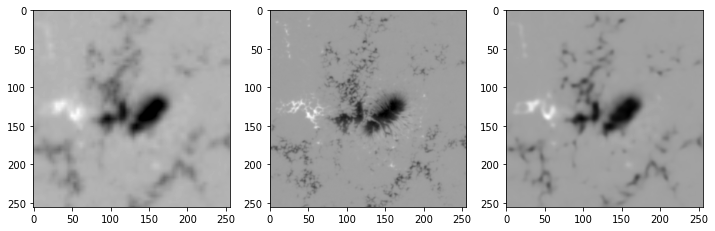

In [ ]:
plt.figure(figsize=(12, 36))
plt.subplot(1, 3, 1)
plt.imshow(x_test_result_pic[0], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(y_test_result_pic[0], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(y_pred_result_pic[0], cmap='gray')
# plt.colorbar()

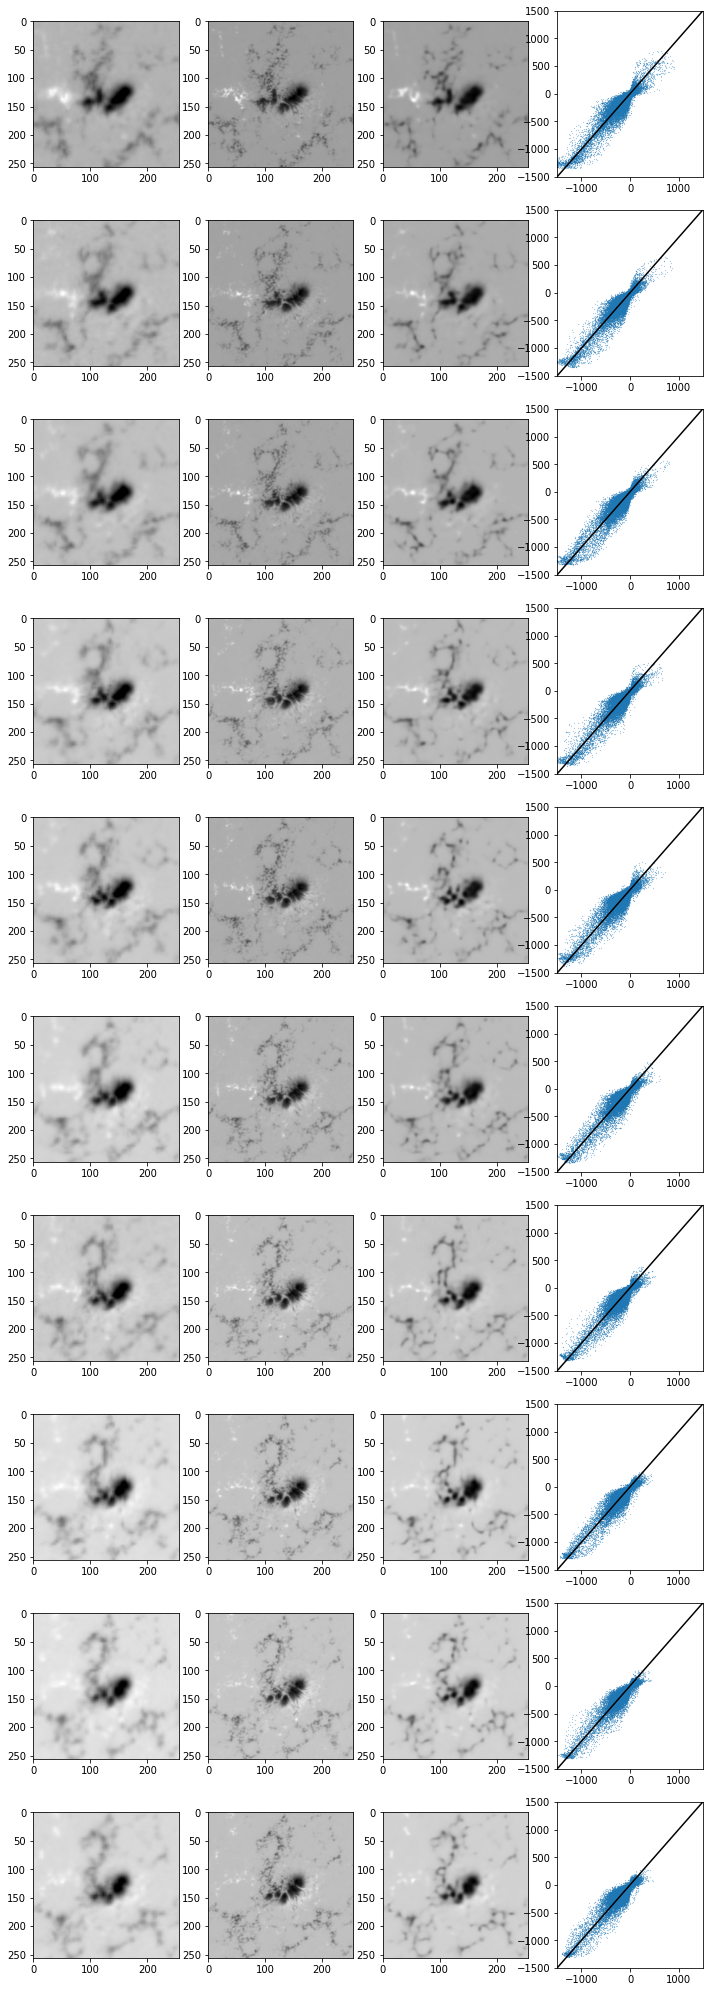

In [ ]:
plt.figure(figsize=(12, 36))
for i in range(10):
    plt.subplot(10, 4, i * 4 + 1)
    plt.imshow(x_test_result_pic[i], cmap='gray')
    plt.subplot(10, 4, i * 4 + 2)
    plt.imshow(y_test_result_pic[i], cmap='gray')
    plt.subplot(10, 4, i * 4 + 3)
    plt.imshow(y_pred_result_pic[i], cmap='gray')
    plt.subplot(10, 4, i * 4 + 4)
    plt.xlim(-1500, 1500)
    plt.ylim(-1500, 1500)
    plt.scatter(x=tf.reshape(y_test_result_pic[i], shape=(-1)), y=tf.reshape(y_pred_result_pic[i], shape=(-1)), s=0.02)
    plt.plot([-1500, 1500], [-1500, 1500], c='black')
# plt.colorbar()

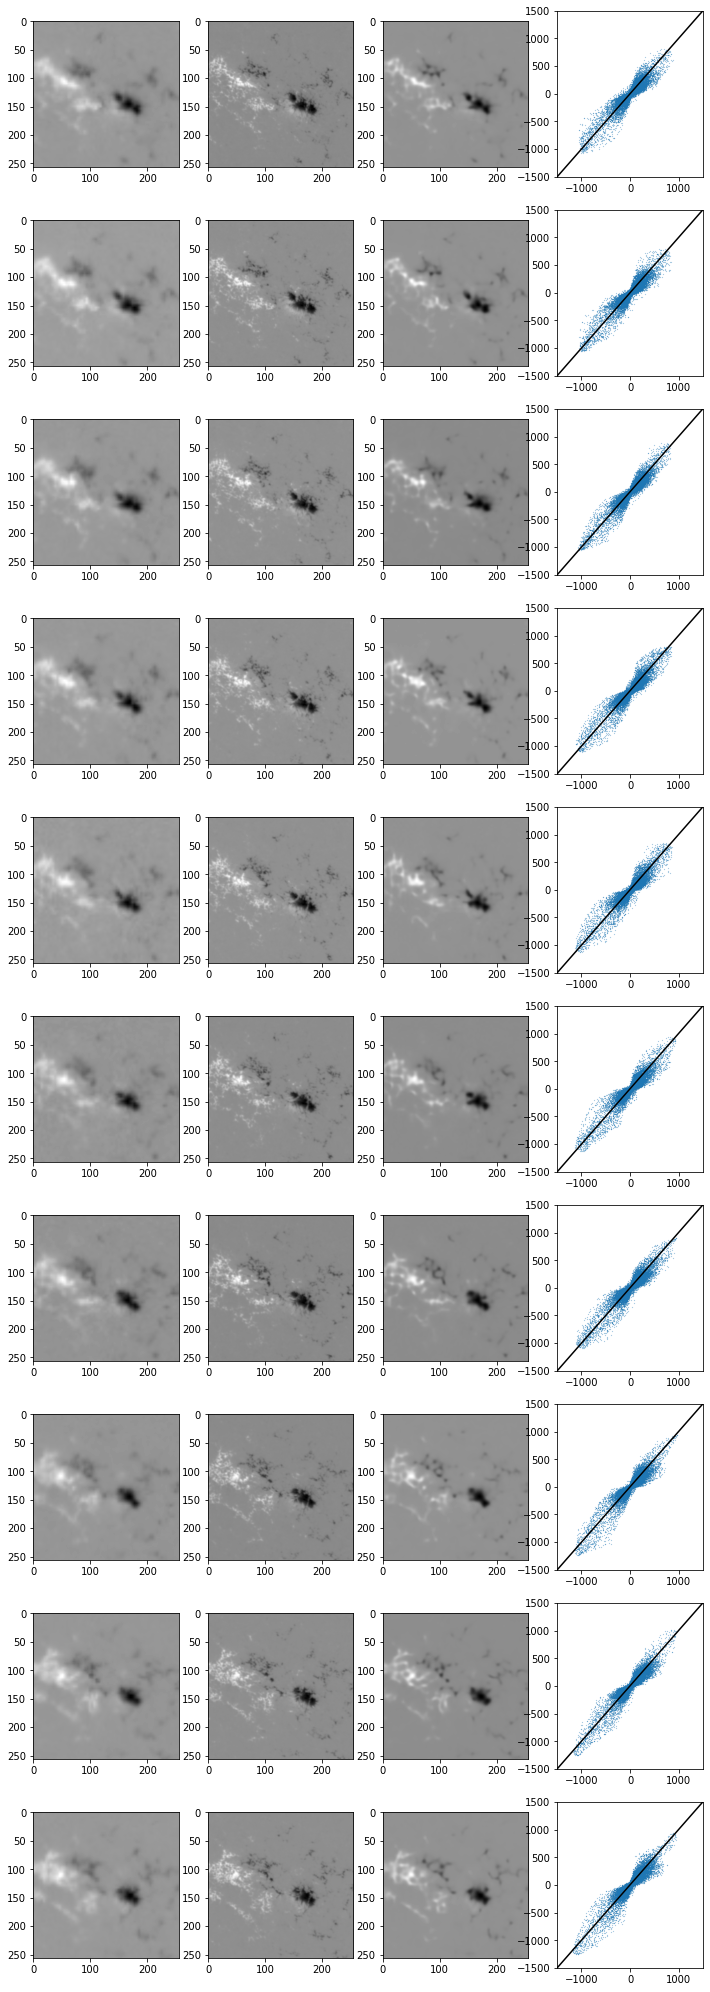

In [ ]:
plt.figure(figsize=(12, 36))
for i in range(10):
    plt.subplot(10, 4, i * 4 + 1)
    plt.imshow(x_test_result_pic[i + 40], cmap='gray')
    plt.subplot(10, 4, i * 4 + 2)
    plt.imshow(y_test_result_pic[i + 40], cmap='gray')
    plt.subplot(10, 4, i * 4 + 3)
    plt.imshow(y_pred_result_pic[i + 40], cmap='gray')
    plt.subplot(10, 4, i * 4 + 4)
    plt.xlim(-1500, 1500)
    plt.ylim(-1500, 1500)
    plt.scatter(x=tf.reshape(y_test_result_pic[i + 40], shape=(-1)), y=tf.reshape(y_pred_result_pic[i + 40], shape=(-1)), s=0.02)
    plt.plot([-1500, 1500], [-1500, 1500], c='black')

In [ ]:
RMSE_pred = tf.keras.metrics.RootMeanSquaredError()
RMSE_pred.update_state(y_pred_result, y_test_result)
RMSE_pred.result().numpy()

57.199608

In [ ]:
RMSE_ori = tf.keras.metrics.RootMeanSquaredError()
RMSE_ori.update_state(x_test_result, y_test_result)
RMSE_ori.result().numpy()

75.79245

In [ ]:
y_pred_result.shape, y_pred_result_pic.shape

(TensorShape([76, 256, 256, 1]), TensorShape([76, 256, 256]))

In [ ]:
# tfp.stats.correlation(y_pred_result, y_test_result, event_axis=None)

In [ ]:
pred_psnr = tf.math.reduce_mean(tf.image.psnr(y_pred_result, y_test_result, max_val=3000.0)).numpy()
pred_psnr

34.63887

In [ ]:
ori_psnr = tf.math.reduce_mean(tf.image.psnr(x_test_result, y_test_result, max_val=3000.0)).numpy()
ori_psnr

32.30354

In [ ]:
pred_pcc = tf.reduce_mean(tfp.stats.correlation(y_pred_result, y_test_result)).numpy()
pred_pcc

0.8771229

In [ ]:
ori_pcc = tf.reduce_mean(tfp.stats.correlation(x_test_result, y_test_result)).numpy()
ori_pcc

0.8626722

In [ ]:
ori_ssim, pred_ssim = tf.reduce_mean(ssim1).numpy(), tf.reduce_mean(ssim2).numpy()
print(ori_ssim, pred_ssim)

0.7910357 0.866172


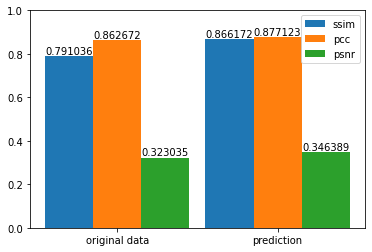

In [ ]:
ssim_data = [ori_ssim, pred_ssim]
psnr_data = [ori_psnr/100, pred_psnr/100]
pcc_data = [ori_pcc, pred_pcc]

x = [0, 2]
x = np.array(x)

total_width, n = 1.8, 3
width = total_width / n
x = x - (total_width - width) / 2

fig, ax = plt.subplots()

rect1 = ax.bar(x, ssim_data,  width=width, label='ssim')
ax.bar_label(rect1)
rect2 = ax.bar(x + width, pcc_data, width=width, label='pcc')
ax.bar_label(rect2)
rect3 = ax.bar(x + 2 * width, psnr_data, width=width, label='psnr')
ax.bar_label(rect3)
plt.legend(loc='upper right')
plt.xticks(x + width, ['original data','prediction'])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()